p-value= 1.5016350781153583e-08


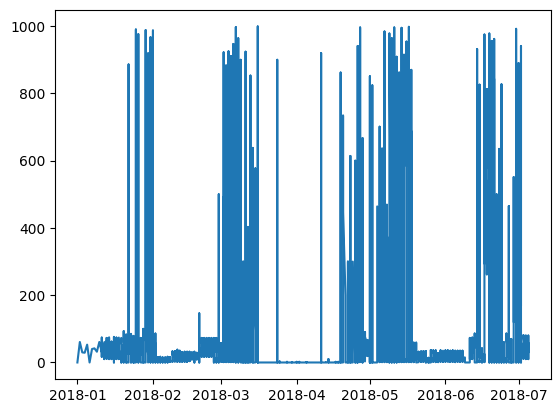

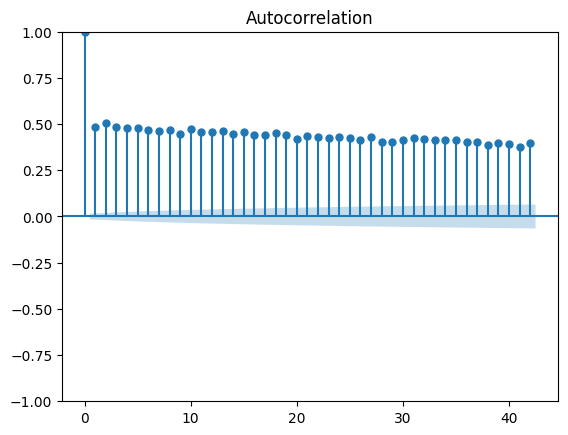

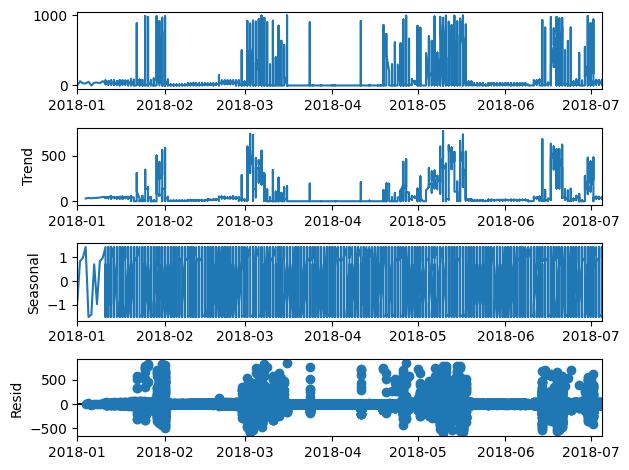

<ipython-input-7-9ba9c89ab94e>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  volume = volume.append(pd.DataFrame(index = last_date))


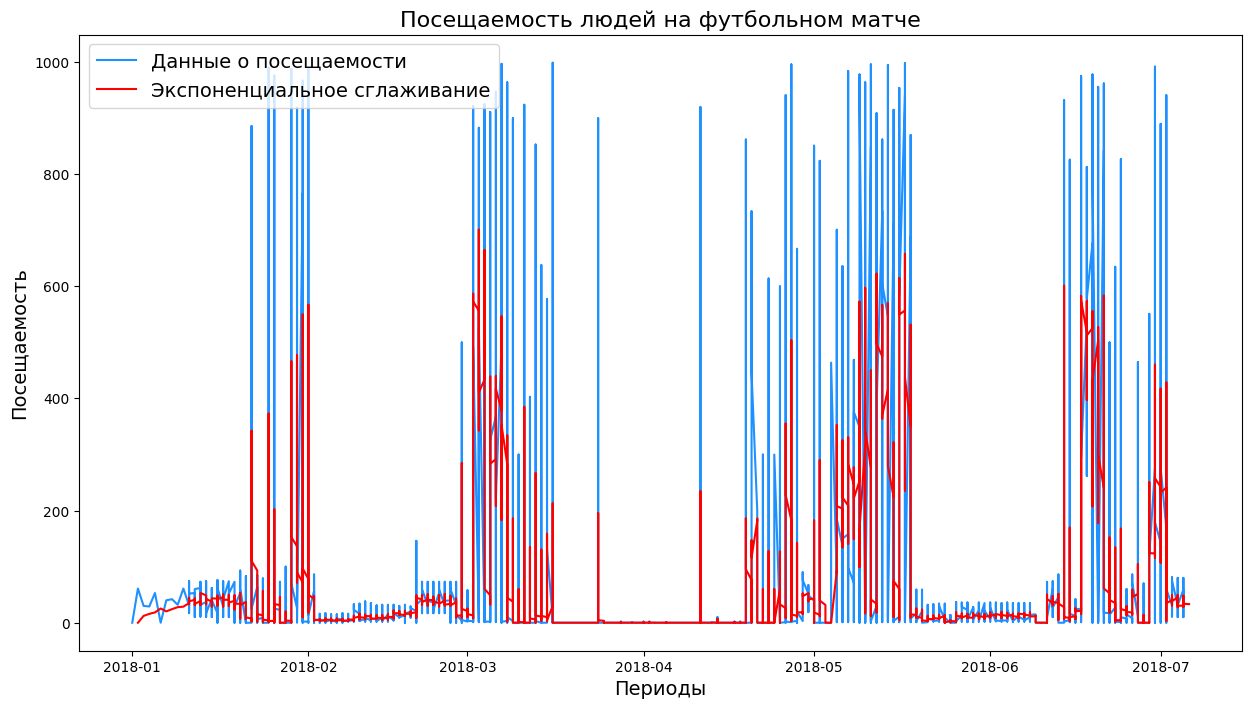

In [ ]:
from statsmodels.tsa.tsatools import freq_to_period
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels. tsa.stattools import adfuller
from statsmodels. graphics.tsaplots import plot_acf
from statsmodels. tsa.seasonal import seasonal_decompose
from pylab import rcParams
import datetime
from datetime import timedelta
volume=pd.read_csv('/content/sample_data/Dataframe.csv',sep=";", index_col=['Date'],  parse_dates=['Date'], dayfirst=True)
plt.plot (volume)
#Выполним тест фуллера
test=adfuller(volume)
print ('p-value= ' +str(test[1]))
#Процесс нестационарный
#Положительная автокорреляция, присутствует тренд
plot_acf(volume)
plt.show
#Проверим нестационарность визуально
decomposition = seasonal_decompose(volume, model='additive', period=7)
decomposition.plot()
plt.show()
alpha=0.2
exp_smoothing = [volume["attendance"][0]]

# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(volume["attendance"])):
  exp_smoothing.append(alpha * volume["attendance"][i] + (1 - alpha) * exp_smoothing[i - 1])

# выведем прогнозное значение
exp_smoothing[-1]
len(volume), len(exp_smoothing)
volume['exp_smoothing'] = exp_smoothing
volume.tail(6)

#сдвинем на один день вперед
last_date = volume.iloc[[-1]].index
#"прибавим" один день
last_date = last_date + timedelta(days = 1)
last_date
#добавим его в датафрейм
volume = volume.append(pd.DataFrame(index = last_date))
#значения за этот день останутся пустыми
volume.tail()
#cдвинем второй столбец.
volume['exp_smoothing'] = volume['exp_smoothing'].shift(1)
#как и должно быть первое прогнозное значение совпадает с предыдущим фактическим
volume.head(6)
#и у нас есть прогноз на один день вперед
volume.tail(6)
#выведем фактические и прогнозные значения на графике
#зададим размер
plt.figure(figsize = (15,8))
#выведем данные о посещаемости и кривую экспоненциального сглаживания
plt.plot(volume['attendance'], label = 'Данные о посещаемости', color = 'dodgerblue')
plt.plot(volume['exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'red')

#добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

#добавим подписи к осям и заголовки
plt.ylabel('Посещаемость', fontsize = 14)
plt.xlabel('Периоды', fontsize = 14)
plt.title('Посещаемость людей на футбольном матче', fontsize = 16)

plt.show()





# Новый раздел